In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import torch

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 12082, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 12082 (delta 0), reused 0 (delta 0), pack-reused 12080
Receiving objects: 100% (12082/12082), 11.88 MiB | 31.53 MiB/s, done.
Resolving deltas: 100% (8384/8384), done.
/content/yolov5
     |████████████████████████████████| 596 kB 8.5 MB/s 


In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-26 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model 

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

## Make Real time image Detection

In [6]:
img = 'C:\\Users\\Administrator\\Pictures\\photos\\simla - manali\\IMG_20190607_130020326.JPG'
results = model(img)
results.print()

FileNotFoundError: ignored

In [7]:
results.render()

NameError: ignored

In [ ]:
results.xyxy

In [ ]:
np.array(results.render()).shape

# Real Time Detection 
## using video and web-cam

In [ ]:
cap = cv.VideoCapture(0)    # o for the web can  , otherwise u can add path of video 
while cap.isOpened():
    ret , frame = cap.read()
    
#     make detections
    results = model(frame)
    cv.imshow("YOLO" ,  np.squeeze(results.render()))
    
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

# Train from the scratch 

In [ ]:
import uuid    # unique identifier 
import os
import time

In [ ]:
Image_path = os.path.join('data', 'Images')
labels = ['Awake' , 'drowst']
number_img = 20

In [ ]:
cap = cv.VideoCapture(0)
# Loop through labels
for label in labels:
    print("colllecting images for {}".format(label))
    time.sleep(3)
    
    # Loop through image range     
    for img_num in range(number_img):
        print("collecting images for {} , image number {}".format(label,img_num))
        
        # webcam feed
        rect , frame = cap.read()
        
        # naming out image path
        imgname = os.path.join(Image_path, label+'.'+str(uuid.uuid1())+'.jpg')
        
        #writes out image to file 
        cv.imwrite(imgname , frame)
        
        # Render to the screen
        cv.imshow("image collection" , frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv.destroyAllWindows()
        

In [ ]:
# !git clone https://github.com/tzutalin/labelImg

In [ ]:
# !pip install pyQt5 lxml 

## Train custom model 

In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data /content/drive/MyDrive/Data/Dataset.yml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/Data/Dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-223-g1dcb774 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, h

## Load Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5','custom',path = '/content/yolov5/runs/train/exp2/weights/last.pt' , force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-5-25 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
img_path = 'photo.jpg'
result = model(img_path)


In [ ]:
result.print()

image 1/1: 480x640 1 drowsy
Speed: 12.6ms pre-process, 29.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


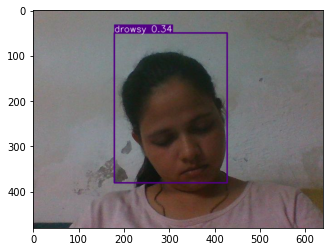

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()
